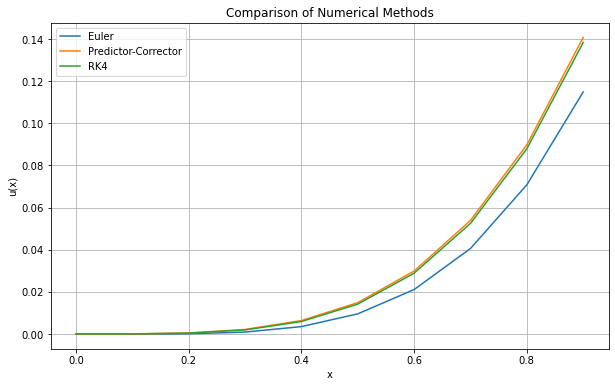

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Initial conditions and parameters
u0 = 0  # initial value
x = 1   # final point
x0 = 0  # initial point
h = 0.1 # step size

def dudx(x,u):
    return x**3 - u

def euler(u0, x, x0, h):
    u = u0
    x_curr = x0
    u_euler = []
    n = int((x-x0)/h)  # number of steps
    
    for i in range(n):
        u_euler.append(u)
        u = u + dudx(x_curr,u)*h
        x_curr = x0 + (i+1)*h
    return u_euler

def predictor_corrector(u0, x, x0, h):
    u = u0
    x_curr = x0
    u_predictor = []
    n = int((x-x0)/h)  # number of steps
    
    for i in range(n):
        u_predictor.append(u)
        u1 = u + dudx(x_curr,u)*h
        u = u + (h/2)*(dudx(x_curr,u) + dudx(x_curr+h,u1))
        x_curr = x0 + (i+1)*h
    return u_predictor

def rk4(u0, x, x0, h):
    u = u0
    x_curr = x0
    u_rk4 = []
    n = int((x-x0)/h)  # number of steps
    
    for i in range(n):
        u_rk4.append(u)
        k1 = h * dudx(x_curr, u)
        k2 = h * dudx(x_curr + 0.5*h, u + 0.5*k1)
        k3 = h * dudx(x_curr + 0.5*h, u + 0.5*k2)
        k4 = h * dudx(x_curr + h, u + k3)
        u = u + (1.0/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        x_curr = x0 + (i+1)*h
    return u_rk4

u1 = euler(u0, x, x0, h)
u2 = predictor_corrector(u0, x, x0, h)
u3 = rk4(u0, x, x0, h)


x_points = np.arange(x0, x, h)

# Plotting 
plt.figure(figsize=(10, 6))
plt.plot(x_points, u1, label='Euler')
plt.plot(x_points, u2, label='Predictor-Corrector')
plt.plot(x_points, u3, label='RK4')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparison of Numerical Methods')
plt.legend()
plt.grid(True)
plt.show()


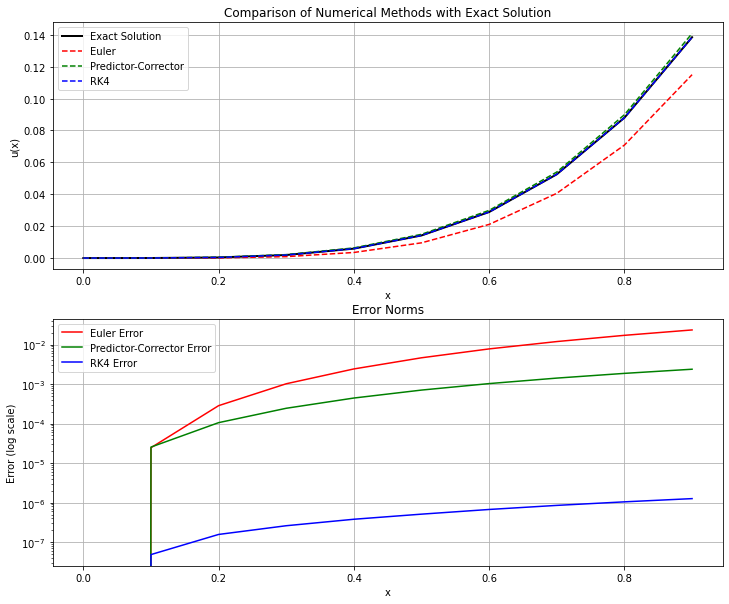

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Initial conditions and parameters
u0 = 0  # initial value
x = 1   # final point
x0 = 0  # initial point
h = 0.1 # step size

def dudx(x,u):
    return x**3 - u

# Function for exact solution using scipy's odeint
def get_exact_solution(x_points):
    def du_dx(u, x):
        return x**3 - u
    u_exact = odeint(du_dx, u0, x_points)
    return u_exact.flatten()

def euler(u0, x, x0, h):
    u = u0
    x_curr = x0
    u_euler = []
    n = int((x-x0)/h)  # number of steps
    
    for i in range(n):
        u_euler.append(u)
        u = u + dudx(x_curr,u)*h
        x_curr = x0 + (i+1)*h
    return u_euler

def predictor_corrector(u0, x, x0, h):
    u = u0
    x_curr = x0
    u_predictor = []
    n = int((x-x0)/h)  # number of steps
    
    for i in range(n):
        u_predictor.append(u)
        u1 = u + dudx(x_curr,u)*h
        u = u + (h/2)*(dudx(x_curr,u) + dudx(x_curr+h,u1))
        x_curr = x0 + (i+1)*h
    return u_predictor

def rk4(u0, x, x0, h):
    u = u0
    x_curr = x0
    u_rk4 = []
    n = int((x-x0)/h)  # number of steps
    
    for i in range(n):
        u_rk4.append(u)
        k1 = h * dudx(x_curr, u)
        k2 = h * dudx(x_curr + 0.5*h, u + 0.5*k1)
        k3 = h * dudx(x_curr + 0.5*h, u + 0.5*k2)
        k4 = h * dudx(x_curr + h, u + k3)
        u = u + (1.0/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        x_curr = x0 + (i+1)*h
    return u_rk4

# Create x-axis points for plotting
x_points = np.arange(x0, x, h)

# Calculate solutions using different methods
u1 = euler(u0, x, x0, h)
u2 = predictor_corrector(u0, x, x0, h)
u3 = rk4(u0, x, x0, h)
u_exact = get_exact_solution(x_points)

# Calculate error norms
error_euler = np.abs(np.array(u1) - u_exact)
error_pc = np.abs(np.array(u2) - u_exact)
error_rk4 = np.abs(np.array(u3) - u_exact)

# Create subplots
plt.figure(figsize=(12, 10))

# Plot solutions
plt.subplot(2, 1, 1)
plt.plot(x_points, u_exact, 'k-', label='Exact Solution', linewidth=2)
plt.plot(x_points, u1, 'r--', label='Euler')
plt.plot(x_points, u2, 'g--', label='Predictor-Corrector')
plt.plot(x_points, u3, 'b--', label='RK4')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparison of Numerical Methods with Exact Solution')
plt.legend()
plt.grid(True)

# Plot error norms
plt.subplot(2, 1, 2)
plt.semilogy(x_points, error_euler, 'r-', label='Euler Error')
plt.semilogy(x_points, error_pc, 'g-', label='Predictor-Corrector Error')
plt.semilogy(x_points, error_rk4, 'b-', label='RK4 Error')
plt.xlabel('x')
plt.ylabel('Error (log scale)')
plt.title('Error Norms')
plt.legend()
plt.grid(True)

plt.show()
